In [1]:
import pandas as pd

df = pd.read_csv('./basetable_oversample_7.csv', sep='\t')

target_df = df[['j_gene', 'CD4/8']]
print(target_df)

             j_gene CD4/8
0         TRBJ02-05   CD4
1         TRBJ02-05   CD4
2         TRBJ01-02   CD4
3         TRBJ02-02   CD4
4         TRBJ02-03   CD4
...             ...   ...
18513497  TRBJ01-05   CD8
18513498  TRBJ02-03   CD8
18513499  TRBJ01-01   CD8
18513500  TRBJ02-07   CD8
18513501  TRBJ02-05   CD8

[18513502 rows x 2 columns]


In [2]:
new_df = pd.DataFrame()
new_df['count'] = target_df.groupby('CD4/8')['j_gene'].value_counts()
new_df_cd4 = new_df.iloc[:13]
new_df_cd8 = new_df.iloc[13:]
print(new_df_cd4)
print(new_df_cd8)

                   count
CD4/8 j_gene            
CD4   TRBJ02-07  1467764
      TRBJ02-01  1241142
      TRBJ01-01  1107486
      TRBJ02-05  1068823
      TRBJ02-03   973099
      TRBJ01-02   928137
      TRBJ02-02   666289
      TRBJ01-05   647051
      TRBJ01-04   296273
      TRBJ01-06   255429
      TRBJ01-03   221989
      TRBJ02-06   199567
      TRBJ02-04   183702
                   count
CD4/8 j_gene            
CD8   TRBJ02-07  2030366
      TRBJ02-01  1575979
      TRBJ01-01  1061875
      TRBJ02-05   937756
      TRBJ02-03   881333
      TRBJ01-02   801329
      TRBJ02-02   652802
      TRBJ01-05   510959
      TRBJ01-04   211806
      TRBJ01-06   155438
      TRBJ02-06   147320
      TRBJ01-03   146526
      TRBJ02-04   143262


In [3]:
norm_df_cd4 = new_df_cd4 / new_df_cd4.sum()
pd.set_option('display.max_rows', None)
norm_df_cd4
norm_df_cd8 = new_df_cd8 / new_df_cd8.sum()
norm_df_cd8

norm_df = pd.concat([norm_df_cd4, norm_df_cd8], ignore_index=False, sort=False)
norm_df

count
CD4/8 j_gene             
CD4   TRBJ02-07  0.158561
      TRBJ02-01  0.134080
      TRBJ01-01  0.119641
      TRBJ02-05  0.115464
      TRBJ02-03  0.105123
      TRBJ01-02  0.100266
      TRBJ02-02  0.071979
      TRBJ01-05  0.069900
      TRBJ01-04  0.032006
      TRBJ01-06  0.027594
      TRBJ01-03  0.023981
      TRBJ02-06  0.021559
      TRBJ02-04  0.019845
CD8   TRBJ02-07  0.219339
      TRBJ02-01  0.170252
      TRBJ01-01  0.114714
      TRBJ02-05  0.101305
      TRBJ02-03  0.095210
      TRBJ01-02  0.086567
      TRBJ02-02  0.070522
      TRBJ01-05  0.055199
      TRBJ01-04  0.022881
      TRBJ01-06  0.016792
      TRBJ02-06  0.015915
      TRBJ01-03  0.015829
      TRBJ02-04  0.015476

In [4]:
final_df = norm_df.reset_index()
print(final_df)
df_sort = final_df.sort_values('j_gene')
print(df_sort)

   CD4/8     j_gene     count
0    CD4  TRBJ02-07  0.158561
1    CD4  TRBJ02-01  0.134080
2    CD4  TRBJ01-01  0.119641
3    CD4  TRBJ02-05  0.115464
4    CD4  TRBJ02-03  0.105123
5    CD4  TRBJ01-02  0.100266
6    CD4  TRBJ02-02  0.071979
7    CD4  TRBJ01-05  0.069900
8    CD4  TRBJ01-04  0.032006
9    CD4  TRBJ01-06  0.027594
10   CD4  TRBJ01-03  0.023981
11   CD4  TRBJ02-06  0.021559
12   CD4  TRBJ02-04  0.019845
13   CD8  TRBJ02-07  0.219339
14   CD8  TRBJ02-01  0.170252
15   CD8  TRBJ01-01  0.114714
16   CD8  TRBJ02-05  0.101305
17   CD8  TRBJ02-03  0.095210
18   CD8  TRBJ01-02  0.086567
19   CD8  TRBJ02-02  0.070522
20   CD8  TRBJ01-05  0.055199
21   CD8  TRBJ01-04  0.022881
22   CD8  TRBJ01-06  0.016792
23   CD8  TRBJ02-06  0.015915
24   CD8  TRBJ01-03  0.015829
25   CD8  TRBJ02-04  0.015476
   CD4/8     j_gene     count
15   CD8  TRBJ01-01  0.114714
2    CD4  TRBJ01-01  0.119641
18   CD8  TRBJ01-02  0.086567
5    CD4  TRBJ01-02  0.100266
24   CD8  TRBJ01-03  0.015829
10   CD4  

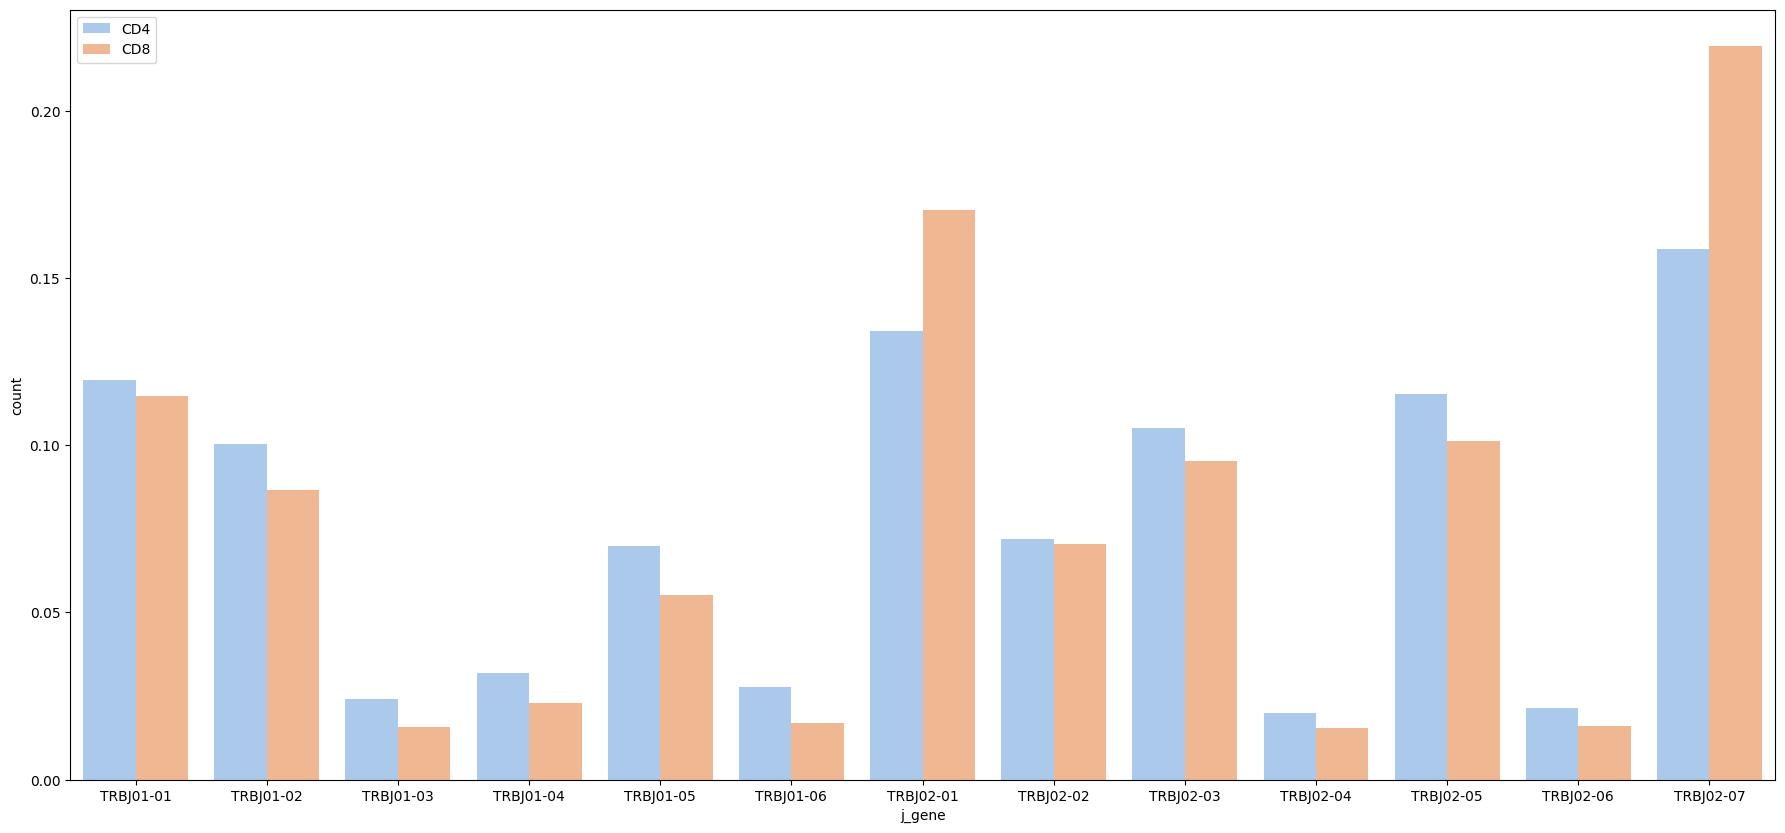

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ax = sns.barplot(data=df_sort,
                 x='j_gene', y='count', hue='CD4/8', hue_order=['CD4', 'CD8'],
                 errorbar='pi', capsize=.01, errcolor=".5",
                 palette='pastel')
plt.xticks(rotation=0)
ax.figure.set_size_inches(22, 10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.show()

In [8]:
v_list = ['TRBV11-03', 'TRBV07-09', 'TRBV07-02', 'TRBV04-02', 'TRBV27', 'TRBV11-01',
          'TRBV29-01', 'TRBV03-01', 'TRBV13', 'TRBV05-04', 'TRBV10-01', 'TRBV06-04',
          'TRBV05-01', 'TRBV20-01', 'TRBV12-03', 'TRBV14', 'TRBV28', 'TRBV07-03',
          'TRBV10-03', 'TRBV02', 'TRBV12-05', 'TRBV04-01', 'TRBV19', 'TRBV18',
          'TRBV06-06', 'TRBV21-01', 'TRBV16', 'TRBV07-08', 'TRBV06-02', 'TRBV11-02',
          'TRBV07-06', 'TRBV09', 'TRBV24-01', 'TRBV05-08', 'TRBV23-01', 'TRBV06-05',
          'TRBV30', 'TRBV05-06', 'TRBV06-01', 'TRBV05-05', 'TRBV07-07', 'TRBV15',
          'TRBV10-02', 'TRBV25-01', 'TRBV07-01', 'TRBV06-08', 'TRBV07-04', 'TRBV12-02',
          'TRBV06-09', 'TRBV05-07', 'TRBV12-01', 'TRBV01', 'TRBV06-07', 'TRBV05-03',
          'TRBV17', 'TRBV07-05', 'TRBV05-02', 'TRBV22-01', 'TRBV08-02', 'TRBV26']
j_list = ['TRBJ01-01', 'TRBJ01-06', 'TRBJ02-07', 'TRBJ02-04', 'TRBJ02-02', 'TRBJ02-01',
          'TRBJ02-03', 'TRBJ01-02', 'TRBJ01-03', 'TRBJ02-05', 'TRBJ02-06', 'TRBJ01-04',
          'TRBJ01-05']

prob_df = pd.DataFrame()
for gene in j_list:
    print(gene)
    final_df_cd4 = target_df[(target_df['j_gene'].str.contains(f'{gene}', na=False)) & (target_df['CD4/8'] == 'CD4')]
    final_df_cd8 = target_df[(target_df['j_gene'].str.contains(f'{gene}', na=False)) & (target_df['CD4/8'] == 'CD8')]
    
    sum = len(final_df_cd4) + len(final_df_cd8)
    print(sum)
    p_cd4 = len(final_df_cd4) / sum
    print('####', p_cd4)
    p_cd8 = len(final_df_cd8) / sum
    print('****', p_cd8)
    
    
    model = ({
        'j_gene': [f'{gene}'],
        'CD4_P': [p_cd4],
        'CD8_P': [p_cd8]
    })
    
    test_df = pd.DataFrame(model)
    prob_df = pd.concat([prob_df, test_df], ignore_index=True, sort=False)
    print(prob_df)

TRBJ01-01
2169361
#### 0.5105125426335221
**** 0.489487457366478
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510513  0.489487
TRBJ01-06
410867
#### 0.6216829290256944
**** 0.37831707097430556
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510513  0.489487
1  TRBJ01-06  0.621683  0.378317
TRBJ02-07
3498130
#### 0.41958532130023757
**** 0.5804146786997625
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510513  0.489487
1  TRBJ01-06  0.621683  0.378317
2  TRBJ02-07  0.419585  0.580415
TRBJ02-04
326964
#### 0.5618416706426396
**** 0.43815832935736043
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510513  0.489487
1  TRBJ01-06  0.621683  0.378317
2  TRBJ02-07  0.419585  0.580415
3  TRBJ02-04  0.561842  0.438158
TRBJ02-02
1319091
#### 0.5051122325904733
**** 0.4948877674095267
      j_gene     CD4_P     CD8_P
0  TRBJ01-01  0.510513  0.489487
1  TRBJ01-06  0.621683  0.378317
2  TRBJ02-07  0.419585  0.580415
3  TRBJ02-04  0.561842  0.438158
4  TRBJ02-02  0.505112  0.494888
TRBJ02-01


In [13]:
cd4_df = pd.DataFrame()
cd4_df[['j_gene', 'probability']] = prob_df[['j_gene', 'CD4_P']]
cd4_df['factor'] = 'CD4'
# print(cd4_df)

cd8_df = pd.DataFrame()
cd8_df[['j_gene', 'probability']] = prob_df[['j_gene', 'CD8_P']]
cd8_df['factor'] = 'CD8'

result_df = pd.concat([cd4_df, cd8_df], ignore_index=True, sort=False)
print(result_df)

       j_gene  probability factor
0   TRBJ01-01     0.510513    CD4
1   TRBJ01-06     0.621683    CD4
2   TRBJ02-07     0.419585    CD4
3   TRBJ02-04     0.561842    CD4
4   TRBJ02-02     0.505112    CD4
5   TRBJ02-01     0.440571    CD4
6   TRBJ02-03     0.524742    CD4
7   TRBJ01-02     0.536661    CD4
8   TRBJ01-03     0.602388    CD4
9   TRBJ02-05     0.532659    CD4
10  TRBJ02-06     0.575308    CD4
11  TRBJ01-04     0.583124    CD4
12  TRBJ01-05     0.558761    CD4
13  TRBJ01-01     0.489487    CD8
14  TRBJ01-06     0.378317    CD8
15  TRBJ02-07     0.580415    CD8
16  TRBJ02-04     0.438158    CD8
17  TRBJ02-02     0.494888    CD8
18  TRBJ02-01     0.559429    CD8
19  TRBJ02-03     0.475258    CD8
20  TRBJ01-02     0.463339    CD8
21  TRBJ01-03     0.397612    CD8
22  TRBJ02-05     0.467341    CD8
23  TRBJ02-06     0.424692    CD8
24  TRBJ01-04     0.416876    CD8
25  TRBJ01-05     0.441239    CD8


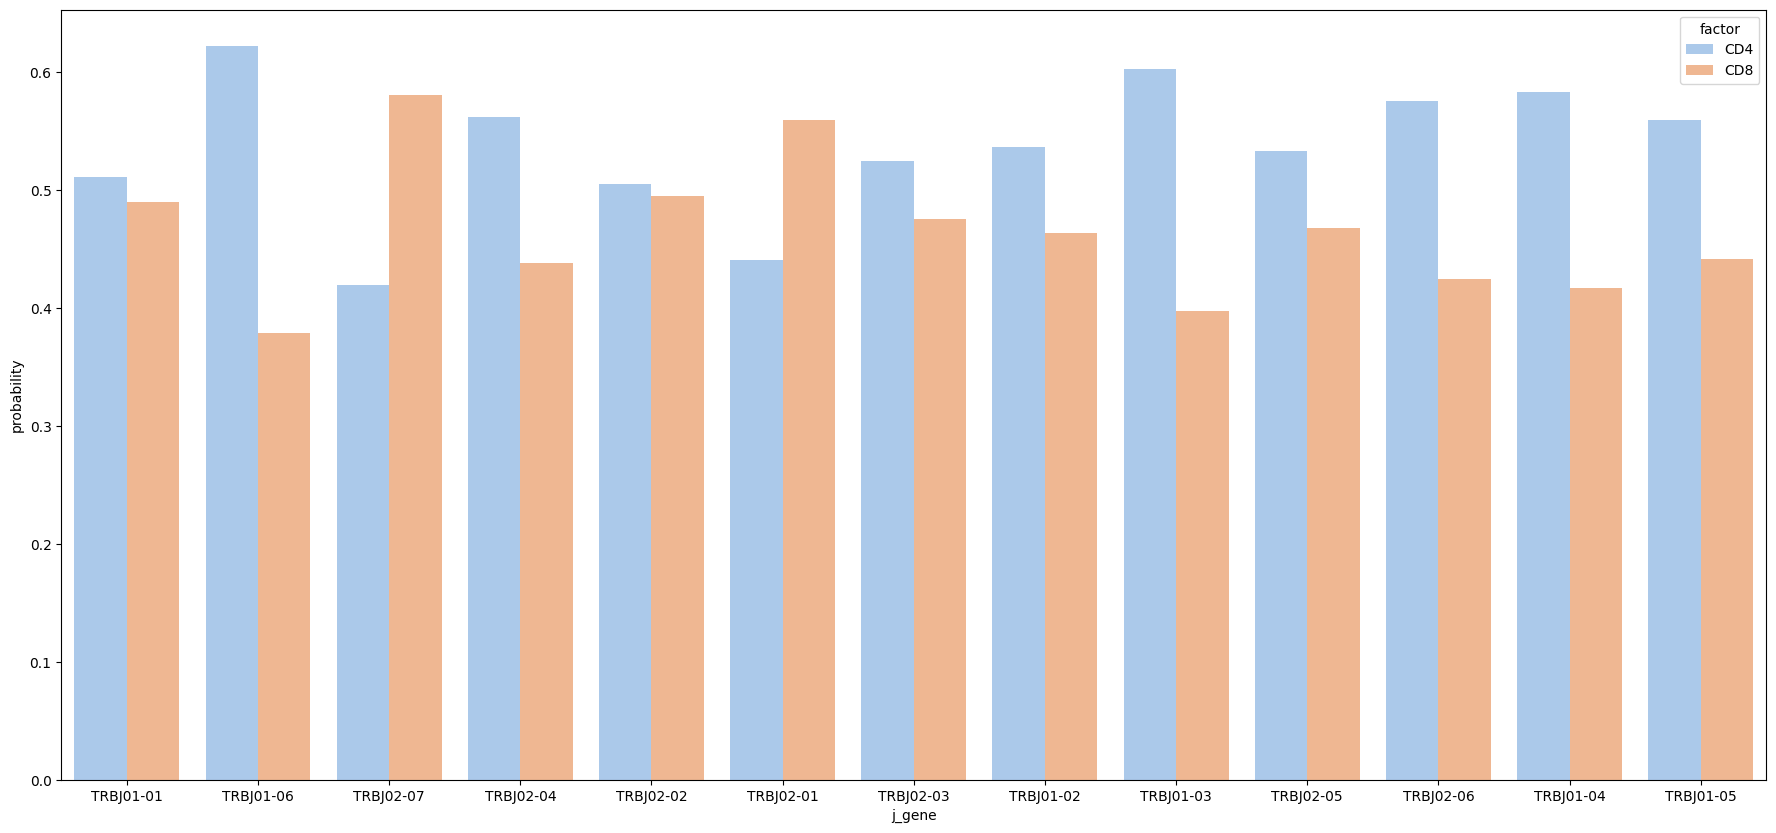

In [16]:
ax = sns.barplot(data=result_df, x='j_gene', y='probability', hue='factor',  palette="pastel")
ax.figure.set_size_inches(22, 10)
plt.xticks(rotation=0)
plt.show()